In [1]:
import numpy as np 
X = np.load("../../Dataset/x_train.npy", allow_pickle=True)
Y = np.load("../../Dataset/y_train.npy", allow_pickle=True)
x_test = np.load("../../Dataset/x_test.npy", allow_pickle=True)
y_test = np.load("../../Dataset/y_test.npy", allow_pickle=True)


In [2]:
X.shape

(1304,)

In [3]:
from collections import Counter

label_counts = Counter(Y)

for label, count in label_counts.items():
    print(f"Label {label}: {count} images")


Label Alejandro_Toledo: 31 images
Label Colin_Powell: 64 images
Label Guillermo_Coria: 24 images
Label Nestor_Kirchner: 30 images
Label Tony_Blair: 64 images
Label Gerhard_Schroeder: 64 images
Label David_Beckham: 25 images
Label Roh_Moo-hyun: 26 images
Label Vladimir_Putin: 39 images
Label Donald_Rumsfeld: 64 images
Label Jean_Chretien: 44 images
Label Lleyton_Hewitt: 33 images
Label Serena_Williams: 41 images
Label Hans_Blix: 31 images
Label Ariel_Sharon: 61 images
Label John_Ashcroft: 42 images
Label Arnold_Schwarzenegger: 34 images
Label Gloria_Macapagal_Arroyo: 35 images
Label Megawati_Sukarnoputri: 26 images
Label Andre_Agassi: 29 images
Label George_W_Bush: 64 images
Label Recep_Tayyip_Erdogan: 24 images
Label John_Negroponte: 25 images
Label Jennifer_Capriati: 34 images
Label Laura_Bush: 33 images
Label Jacques_Chirac: 42 images
Label Luiz_Inacio_Lula_da_Silva: 38 images
Label Tom_Ridge: 26 images
Label Silvio_Berlusconi: 26 images
Label Hugo_Chavez: 57 images
Label Junichiro_K

In [4]:
import numpy as np

# Assuming y_train is your list of labels corresponding to x_train
unique_identities = np.unique(Y)

print(f"There are {len(unique_identities)} unique identities.")

There are 34 unique identities.


In [5]:
from collections import Counter

# Assuming y_train is your list of labels corresponding to x_train
label_counts = Counter(Y)

# Find the identity with the least number of images
min_label, min_count = min(label_counts.items(), key=lambda x: x[1])

print(f"Identity {min_label} has the least number of images: {min_count} images")


Identity Guillermo_Coria has the least number of images: 24 images


In [6]:
Y[0]

'Naomi_Watts'

In [7]:
x_test.shape

(431, 250, 250, 3)

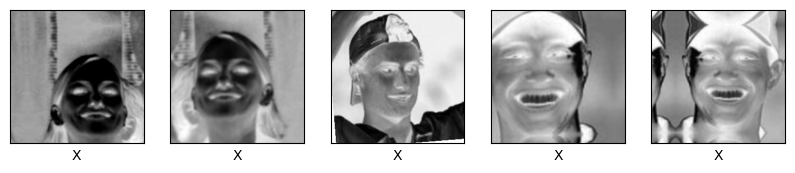

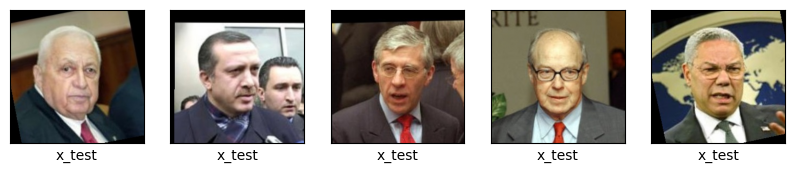

In [8]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, title):
    plt.figure(figsize=(10,10))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(title)
    plt.show()

# Plot images from X
plot_images(X, "X")

# Plot images from x_test
plot_images(x_test, "x_test")


In [9]:
import cv2
import numpy as np

def normalize_images(image_array):
    # Normalize the images and convert them to 8-bit
    for i, image in enumerate(image_array):
        image = ((image - np.min(image)) / (np.max(image) - np.min(image))) * 255
        image = cv2.convertScaleAbs(image)
        image_array[i] = image
    return image_array

# Apply the function to our X and x_test
X_normalized = normalize_images(X)
x_test_normalized = normalize_images(x_test)


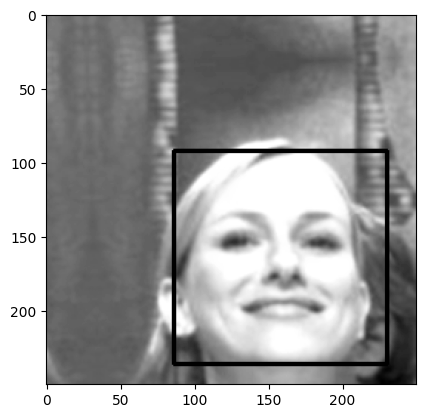

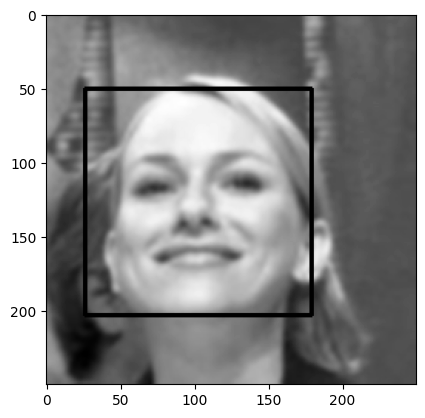

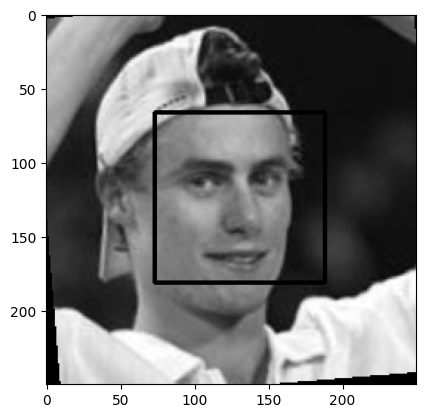

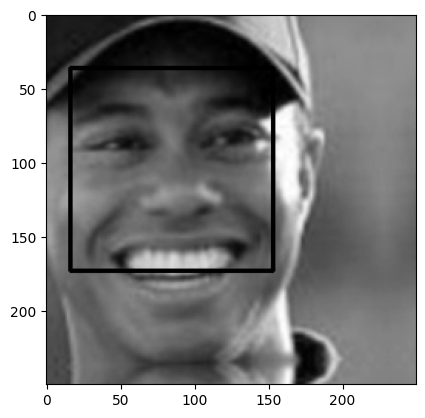

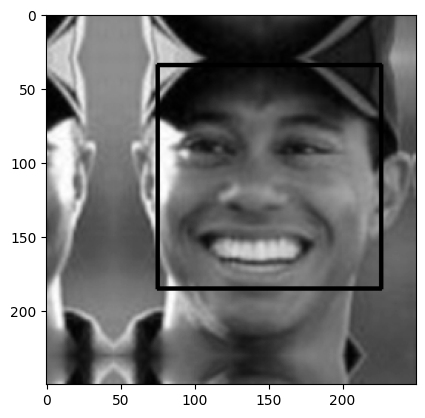

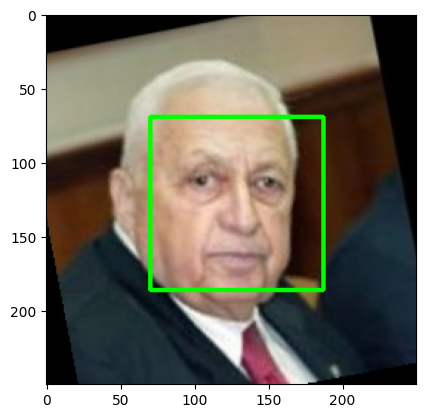

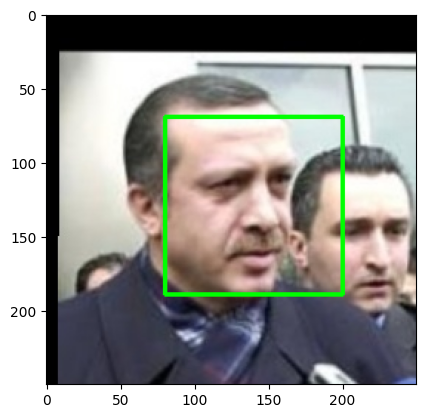

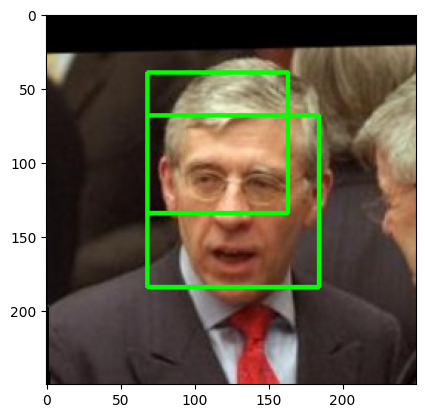

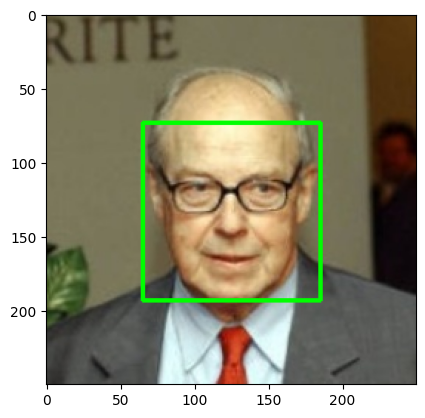

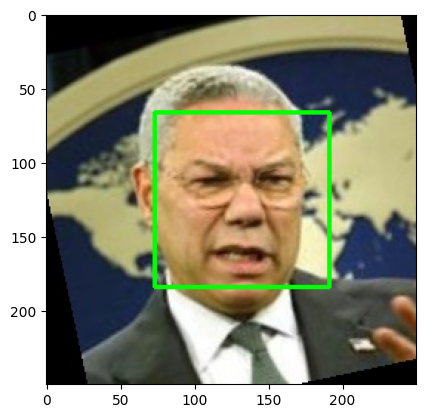

In [10]:
import cv2
import matplotlib.pyplot as plt

def detect_faces_in_image(input_image):
    # Initialize face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to 8-bit
    image = cv2.convertScaleAbs(input_image)
    
    # Check if the image is already grayscale
    if len(image.shape) == 3:
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()

for i, image in enumerate(X_normalized):
    if i < 5:
        detect_faces_in_image(image)

for i, image in enumerate(x_test_normalized):
    if i < 5:
        detect_faces_in_image(image)


In [11]:
print(x_test[0].dtype)


float64


# crop the face

In [12]:
import cv2

def detect_and_crop_faces_in_image(input_image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to 8-bit
    image = cv2.convertScaleAbs(input_image)
    
    # Check if the image is already grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # If a face is detected, crop it out
    if len(faces) > 0:
        x, y, w, h = faces[0]
        cropped_face = image[y:y+h, x:x+w]
        return cropped_face
    return image

final_X = []
final_x_test = []

# Call the function with your images
for image in X_normalized:
    cropped_face = detect_and_crop_faces_in_image(image)
    final_X.append(cropped_face) 

for image in x_test_normalized:
    cropped_face = detect_and_crop_faces_in_image(image)
    final_x_test.append(cropped_face)  


In [13]:
for i, images in enumerate(final_x_test):
    for j, image in enumerate(images):
        print(f"Image {j+1} in list {i+1} has dimensions {image.shape}.")


Image 1 in list 1 has dimensions (117, 3).
Image 2 in list 1 has dimensions (117, 3).
Image 3 in list 1 has dimensions (117, 3).
Image 4 in list 1 has dimensions (117, 3).
Image 5 in list 1 has dimensions (117, 3).
Image 6 in list 1 has dimensions (117, 3).
Image 7 in list 1 has dimensions (117, 3).
Image 8 in list 1 has dimensions (117, 3).
Image 9 in list 1 has dimensions (117, 3).
Image 10 in list 1 has dimensions (117, 3).
Image 11 in list 1 has dimensions (117, 3).
Image 12 in list 1 has dimensions (117, 3).
Image 13 in list 1 has dimensions (117, 3).
Image 14 in list 1 has dimensions (117, 3).
Image 15 in list 1 has dimensions (117, 3).
Image 16 in list 1 has dimensions (117, 3).
Image 17 in list 1 has dimensions (117, 3).
Image 18 in list 1 has dimensions (117, 3).
Image 19 in list 1 has dimensions (117, 3).
Image 20 in list 1 has dimensions (117, 3).
Image 21 in list 1 has dimensions (117, 3).
Image 22 in list 1 has dimensions (117, 3).
Image 23 in list 1 has dimensions (117, 3

In [14]:
from skimage import feature, transform
import cv2
import numpy as np

def extract_hog_features(images):
    hog_features_list = []
    for image in images:
        image_resized = transform.resize(image, (64, 168))
        
        # Check if the image is grayscale or color
        if len(image_resized.shape) == 3 and image_resized.shape[2] == 3:
            # The image is a color image, convert it to grayscale
            image_resized_32 = image_resized.astype(np.float32)
            gray = cv2.cvtColor(image_resized_32, cv2.COLOR_BGR2GRAY)
        else:
            # The image is already grayscale
            gray = image_resized
        
        # Extract HOG features
        hog_features = feature.hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features_list.append(hog_features)
    
    return hog_features_list


hog_features_X = extract_hog_features(final_X)
hog_features_x_test = extract_hog_features(final_x_test)


In [15]:
# print(type(final_X[0]))
# print(type(final_x_test[0]))


In [16]:
# for i, images in enumerate(final_X):
#     print(f"Image {i+1} has {len(images)} faces.")


In [17]:
# for i, hog_features_list in enumerate(X_train_hog):
#     for j, hog_features in enumerate(hog_features_list):
#         print(f"HOG features {j+1} in list {i+1} has length {len(hog_features)}.")


In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Define the classifiers
classifiers = {
    'SVM': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
}

# Split the training set into a smaller training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(hog_features_X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    
    print(f"Evaluating {name} on the validation set...")
    y_val_pred = clf.predict(X_val)
    print(classification_report(y_val, y_val_pred))
    accuracy_val = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy_val}")
    
    print(f"Evaluating {name} on the test set...")
    y_test_pred = clf.predict(hog_features_x_test)
    print(classification_report(y_test, y_test_pred))
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {accuracy_test}")


Training SVM...
Evaluating SVM on the validation set...


c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                           precision    recall  f1-score   support

         Alejandro_Toledo       1.00      0.83      0.91         6
             Alvaro_Uribe       0.00      0.00      0.00         6
          Amelie_Mauresmo       0.32      0.60      0.41        10
             Andre_Agassi       1.00      0.67      0.80         6
           Angelina_Jolie       0.46      0.92      0.62        13
             Ariel_Sharon       0.82      0.90      0.86        10
    Arnold_Schwarzenegger       1.00      0.14      0.25         7
     Atal_Bihari_Vajpayee       0.00      0.00      0.00         4
             Bill_Clinton       0.00      0.00      0.00         4
             Carlos_Menem       0.48      1.00      0.65        10
             Colin_Powell       0.59      1.00      0.74        10
            David_Beckham       0.00      0.00      0.00         5
          Donald_Rumsfeld       0.80      0.80      0.80        10
         George_Robertson       0.80      0.80      0.80     

c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                           precision    recall  f1-score   support

         Alejandro_Toledo       1.00      0.12      0.22         8
             Alvaro_Uribe       1.00      0.43      0.60         7
          Amelie_Mauresmo       0.20      0.50      0.29         4
             Andre_Agassi       0.67      0.29      0.40         7
           Angelina_Jolie       0.22      0.50      0.31         4
             Ariel_Sharon       0.60      0.50      0.55        12
    Arnold_Schwarzenegger       1.00      0.12      0.22         8
     Atal_Bihari_Vajpayee       0.00      0.00      0.00         5
             Bill_Clinton       0.00      0.00      0.00         6
             Carlos_Menem       0.17      0.50      0.25         4
             Colin_Powell       0.61      0.92      0.73        12
            David_Beckham       1.00      0.17      0.29         6
          Donald_Rumsfeld       0.67      0.83      0.74        12
         George_Robertson       0.43      0.60      0.50     

c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo